## Observations and Insights 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [3]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

dataset = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')
# Display the data table for preview
dataset



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.

dataset['Mouse ID'].value_counts()

g989    13
n364    10
g296    10
f345    10
e584    10
        ..
x226     1
d133     1
b447     1
v199     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = dataset[dataset.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset = dataset.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regimen_groupby = clean_dataset.groupby('Drug Regimen')
#drug_regimen_groupby['Drug Regimen'].count()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].median()
variance_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].var()
standard_variance_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].std()
SEM_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_statistics_table = pd.DataFrame({"Mean" : mean_tumor_volume,
                                       "Median" : median_tumor_volume,
                                        "Variance" : variance_tumor_volume,
                                        "Standard Deviation" : standard_variance_tumor_volume,
                                        "SEM of the tumor volume" : SEM_tumor_volume})
summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM of the tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_method = clean_dataset.groupby('Drug Regimen').agg({
  'Tumor Volume (mm3)':["mean", "median", "var", "std","sem"]
} )
aggregation_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

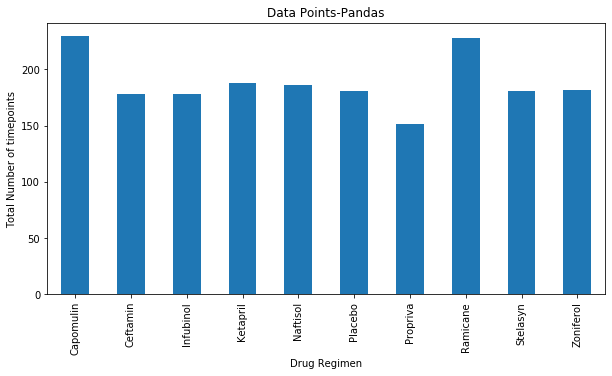

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_groupby['Timepoint'].count().plot(kind="bar", figsize=(10,5))

#change the xlabel and ylabel
plt.title("Data Points-Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of timepoints")

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

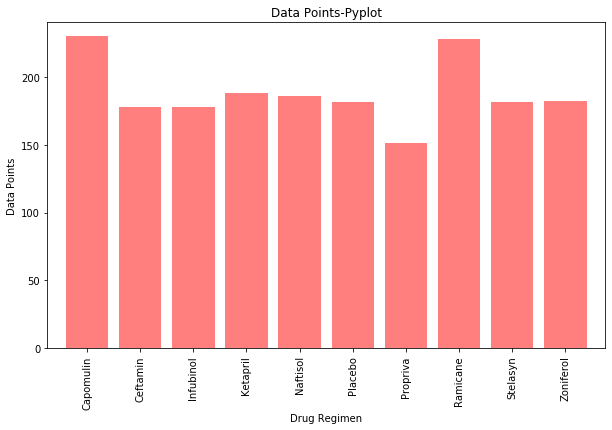

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
x_axis = summary_statistics_table.index.values.tolist()
plt.bar(x_axis, drug_regimen_groupby['Timepoint'].count(), color='r', alpha=0.5, align="center")

#change the range of the graph
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_groupby['Timepoint'].count())+10)

#change the xlabel and ylabel
plt.title("Data Points-Pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation = 'vertical')

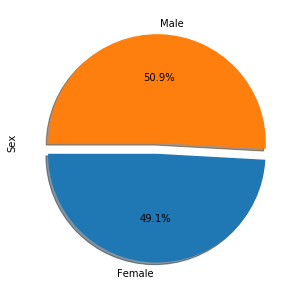

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_groupby = clean_dataset.groupby('Sex')

#change the setting of the pie plot
explode = (0.1, 0)
gender_groupby_count = gender_groupby['Sex'].count()
gender_groupby['Sex'].count().plot(kind="pie", figsize=(10,5),explode = explode, autopct='%1.1f%%',startangle=180, shadow = True)

(-1.1031820581353549,
 1.1062681398501735,
 -1.212252015624918,
 1.1088018781228466)

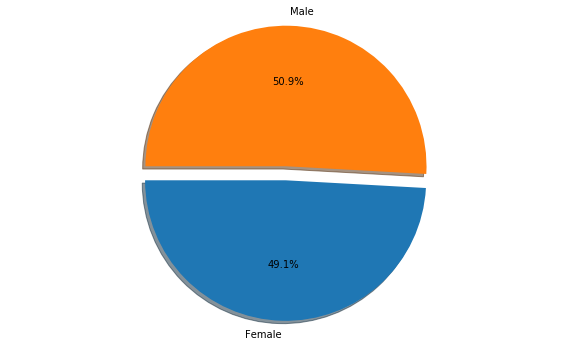

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,6))

#change the setting of the pie plot
explode = (0.1, 0)
gender_labels = gender_groupby_count.index.values.tolist()
plt.pie(gender_groupby['Sex'].count(), labels=gender_labels,
        autopct="%1.1f%%", shadow=True, startangle = 180, explode = explode)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = study_results.loc[study_results['Timepoint'] == 45]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint_dataset = pd.merge(mouse_metadata, last_timepoint, on = "Mouse ID", how = 'right')

#group by the drug regimen
merged_timepoint_dataset_groupby = merged_timepoint_dataset.groupby('Drug Regimen')

#pull out all the tumor volume base on the groupby and put into a list
all_treatment_data = merged_timepoint_dataset_groupby['Tumor Volume (mm3)'].apply(list)

#put list into a dataframe
all_treatment_data_df = pd.DataFrame(all_treatment_data)

In [132]:
# Put treatments into a list for for loop (and later for plot labels)
top_treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Locate the rows which contain mice on each drug and get the tumor volumes
top_tumor_df = all_treatment_data_df.loc[['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = [volume for volume in top_tumor_df['Tumor Volume (mm3)']]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = tumor_vol.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#IQR = upperq-lowerq
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
# Determine outliers using upper and lower bounds
    

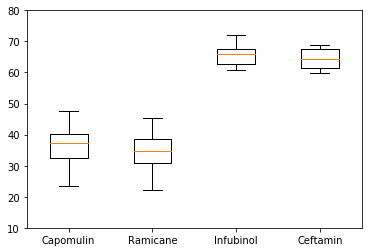

In [133]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=top_treatment)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

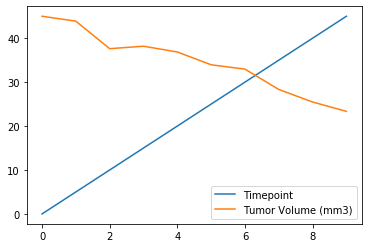

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
the_specific_mouse = clean_dataset[clean_dataset["Mouse ID"].isin(["s185"])]

#retrive the data of specific columns
specitic_mouse_data = the_specific_mouse[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

#reset the index
plotful_df = specitic_mouse_data.reset_index()

#drop the index line
final_plotful = plotful_df.drop(columns = ["index"])

#generate the line chart
line_plot = final_plotful.plot.line()

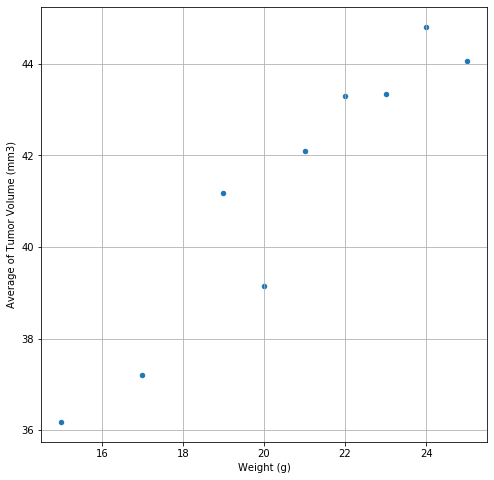

In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter_plot = clean_dataset[clean_dataset["Drug Regimen"].isin(["Capomulin"])]

#group the weight and calculate the mean of the tumor volume
average_tumor_volume = capomulin_scatter_plot.groupby("Weight (g)")['Tumor Volume (mm3)'].mean()

#reset the index & rename the columns
reset_index = average_tumor_volume.reset_index()

#rename the columns
reset_index = reset_index.rename(columns = {"Tumor Volume (mm3)":"Average of Tumor Volume (mm3)"})

#generate the scatter plot
scatter_plot = reset_index.plot(kind='scatter', x='Weight (g)', y='Average of Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

In [109]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
x_values = reset_index.iloc[:,0]
y_values = reset_index.iloc[:,1]

#calculate the correlation and print this out
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.95


The r-squared is: 0.9034966277438606


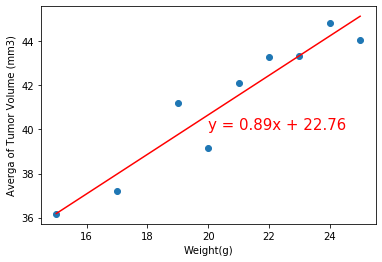

In [136]:
#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#draw the scatter chart
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

#change the x and y label
plt.xlabel('Weight(g)')
plt.ylabel('Averga of Tumor Volume (mm3)')

#print the function on the chart
print(f"The r-squared is: {rvalue**2}")
plt.show()